<font color='black'><font size="4">Notebook analyse des données -- Le plan de ce notebook Projet 3 est le suivant:</font></font>
<font color='black'><font size="3"> <ul>
<li>Lire le fichier csv et le présenter sous forme du DataFrame </li>
<li>Présentation graphique du Nutriscore et Nova groupe </li>
<li>Présentation graphique du nombre d'ingrédients contenant de l'huile de palme</li>
<li>Présentation graphique du differents vitamines</li>
<li>Distribution du nutriscore par pays</li> 
<li>Etudier la corrélation entre certains variables</li>
<li>Etudier l'influence de deux variables indépendantes catégorielles différentes sur une variable dépendante continue. </li>
<li>Présentation de l'application </li>
</ul>   </font></font>


In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as pl
%matplotlib inline
#import sys
#!{sys.executable} -m pip install termcolor
from termcolor import colored
#import sys
#!{sys.executable} -m pip install pycountry
import pycountry

## A) Lire le fichier csv et le présenter sous forme du DataFrame

In [2]:
## normalise_df_Nan est le fichier nettoyer dans le notebook nettoyage
df_data = pd.read_csv("normalise_df_Nan.csv")

In [3]:
df_data 

,product_name,main_category,origins,countries,brands,ingredients_that_may_be_from_palm_oil_n,nutriscore_score,nova_group,nutrition-score-fr_100g,collagen-meat-protein-ratio_100g,carbon-footprint-from-meat-or-fish_100g,-lactose_100g,vitamin-b12_100g,vitamin-b6_100g,omega-3-fat_100g,vitamin-d_100g,calcium_100g,iron_100g,zinc_100g
0,moutarde au moût de raisin,mustards,NaN,France,courte paille,0.000000,18.000000,3.400316,18.000000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.009536,0.001814,NaN
1,Salsa de mostaza,mustards,NaN,España,"Prima,//Propiedad de://,Bolton Cile España S.A...",0.000000,11.470968,3.000000,11.470968,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.009536,0.001814,NaN
2,Hierba de trigo,mustards,NaN,France,NaN,0.008523,0.000000,3.400316,0.000000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.009536,0.001814,NaN
3,Yellow Mustard,mustards,NaN,United states,Heinz,0.000000,10.000000,3.000000,10.000000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN
4,Moutarde Posh Dog,mustards,NaN,"France, royaume-uni",Marks & Spencer,0.008523,7.000000,3.400316,7.000000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.009536,0.001814,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532493,"Mois 0,50 aluays",tiket,NaN,France,Aluays,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
532494,J9V87-90013,11,NaN,Saudi arabia,hp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
532495,cube mendiants,de-couverture,NaN,France,maison Gaucher,0.000000,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
532496,raviolis pekinois surgelés,pekinois,Hongrie,France,asia food,0.000000,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## B) Distribution du Nutriscore et Nova groupe dans le dataframe

<font color='darkblue'><font size="3">Le nutriscore est présenté en chiffres, dans le lien suivant nous trouverons leurs correspondances en classe</font></font>
<font size="2.5"><a> https://fr.wikipedia.org/wiki/Nutri-score </a></font></font>

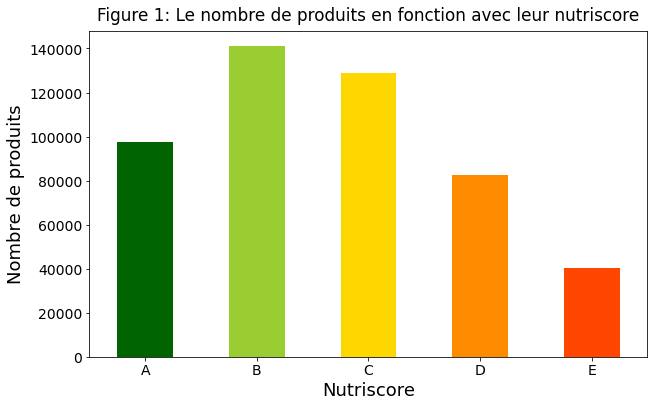

In [4]:
## Nutriscore
pl.figure(figsize=(10,6))
pl.rcParams.update({'font.size': 14}) # must set in top

bins = [-15,-1,4,12,17,40] 
labels = ['A','B','C','D','E']
nutriscore_groups = pd.cut(df_data.nutriscore_score, bins,labels=labels)
df_data["nutriscore_groups"] = nutriscore_groups

color= ['darkgreen', 'yellowgreen', 'gold','darkorange','orangered']
values_count_nutri = pd.value_counts(df_data['nutriscore_groups']).loc[['A','B','C','D','E']]
ax = values_count_nutri.plot.bar(rot=0, color=color)
ax.set_ylabel('Nombre de produits',fontdict={'fontsize':18})
ax.set_xlabel('Nutriscore',fontdict={'fontsize':18})
ax.set_title('Figure 1: Le nombre de produits en fonction avec leur nutriscore',pad=10)
pl.show()

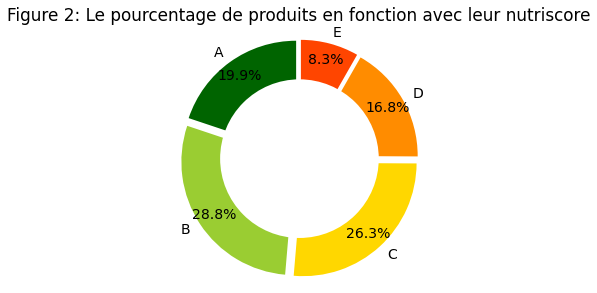

In [5]:
percent_nutri = values_count_nutri/values_count_nutri.sum()

labels = ['A', 'B', 'C', 'D', 'E']
#colors
#colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0']

#explsion
explode = (0.05,0.05,0.05,0.05,0.05)
fig1, ax1 = pl.subplots()
ax1.pie(percent_nutri, colors = color, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = pl.Circle((0,0),0.70,fc='white')
fig = pl.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
pl.tight_layout()
pl.title("Figure 2: Le pourcentage de produits en fonction avec leur nutriscore",pad=10)
pl.show()

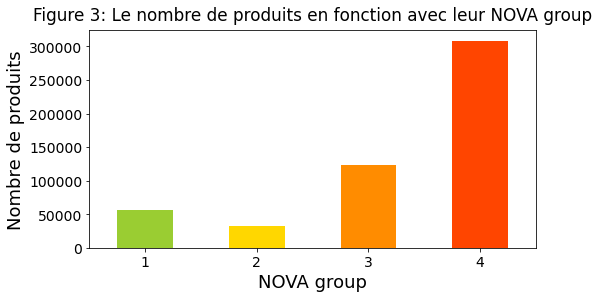

In [6]:
## Nova group
pl.figure(figsize=(8,4))
labels = ['1','2','3','4']
bins=[0, 1, 2, 3, 4]
nova_grp = pd.cut(df_data["nova_group"], bins, labels=labels)
df_data["nova_grp"] = nova_grp

values_count_NOVA = pd.value_counts(df_data["nova_grp"]).loc[['1','2','3','4']]
ax1 = values_count_NOVA.plot.bar(rot=0, color=color[1:])
ax1.set_ylabel('Nombre de produits',fontdict={'fontsize':18})
ax1.set_xlabel('NOVA group',fontdict={'fontsize':18})
ax1.set_title('Figure 3: Le nombre de produits en fonction avec leur NOVA group',pad=10)
pl.show()

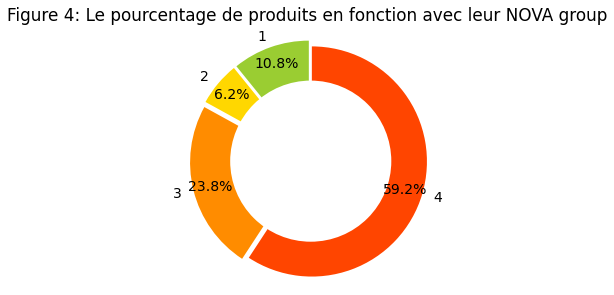

In [7]:
percent_NOVA = values_count_NOVA/values_count_NOVA.sum()

labels = ['1', '2', '3', '4']

#explsion
explode = (0.05,0.05,0.05,0.01)
fig2, ax2 = pl.subplots()
ax2.pie(percent_NOVA, colors = color[1:], labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)

#draw circle
centre_circle = pl.Circle((0,0),0.70,fc='white')
fig2 = pl.gcf()
fig2.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax2.axis('equal')  
pl.tight_layout()
pl.title("Figure 4: Le pourcentage de produits en fonction avec leur NOVA group",pad=10)
pl.show()

## C) Présentation graphique du nombre d'ingrédients contenant de l'huile de palme

Text(0.5, 1.0, "Figure 5: Le nombre d'ingrédients contenant de l'huile de palme")

<Figure size 720x576 with 0 Axes>

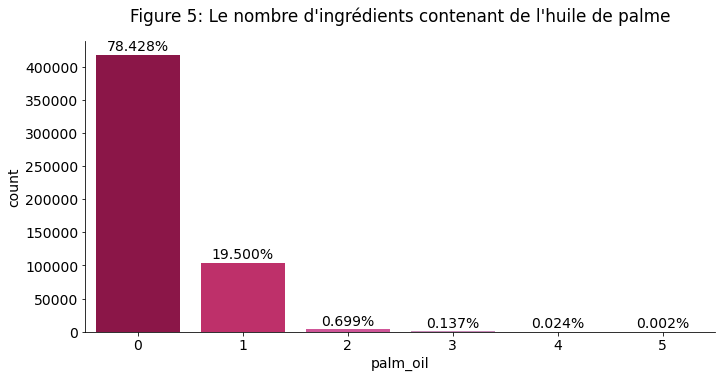

In [8]:
df_new = df_data
#percent = np.array([])
pl.figure(figsize=(10,8))
labels = ['0','1','2','3','4','5']
bins=[-1, 0, 1, 2, 3, 4, 5]
palm_oil = pd.cut(df_data["ingredients_that_may_be_from_palm_oil_n"], bins, labels=labels)
df_new["palm_oil"] = palm_oil

sn.color_palette("BuPu")
g = sn.catplot(x="palm_oil",data=df_new,kind="count",order=labels,palette="PuRd_r", aspect=2)
ax.set(xlabel='palm oil', ylabel='nombre des produits',title='Le nombre de produits en fonction qui contient du pal oil')
ax = g.facet_axis(0,0)

total = len(df_new['palm_oil'])
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.3f}%\n'
   # percent = np.append(percent, np.round(100 * p.get_height() / total,4))
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
pl.title("Figure 5: Le nombre d'ingrédients contenant de l'huile de palme", pad=20)

## D) Présentation graphique du nombre de produits en fonction de la masse de leur vitamins

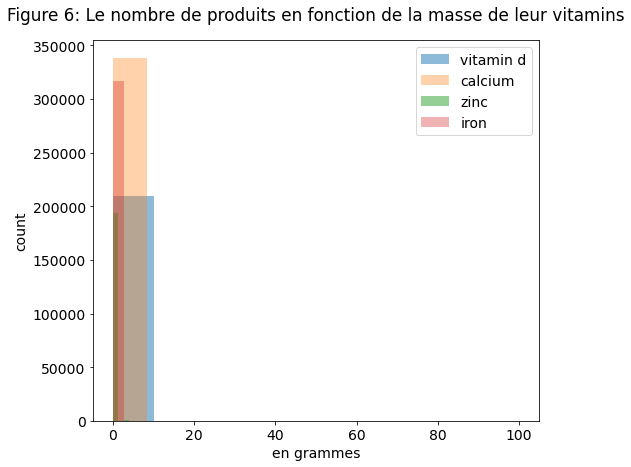

In [12]:
### nous utiliserons ">0.0" juste pour visualiser le nombre du produits dont nous n'avons pas des valeurs nulles
### nous faisons chaque vitamine individuellement afin de ne pas avoir de valeurs erronée 
### nous visualisons toutes les vitamines sur le même graphique pour ne pas surcharger le Notebook
df_vitaminD=df_data[df_data["vitamin-d_100g"]>0.0]
df_calcium=df_data[df_data["calcium_100g"]>0.0]
df_zinc=df_data[df_data["zinc_100g"]>0.0]
df_iron=df_data[df_data["iron_100g"]>0.0]

pl.figure(figsize=(8,7))
df_vitaminD['vitamin-d_100g'].plot.hist(alpha=0.5,label="vitamin d")
df_calcium["calcium_100g"].plot.hist(alpha=0.35, label="calcium")
df_zinc["zinc_100g"].plot.hist(alpha=0.5,label="zinc")
df_iron["iron_100g"].plot.hist(alpha=0.35,label="iron")
pl.xlabel ('en grammes')
pl.ylabel('count')
pl.title("Figure 6: Le nombre de produits en fonction de la masse de leur vitamins",pad=20)
pl.legend()

## E) Distribution du nutriscore par pays

<font color='darkblue'><font size="3">la variable "countries" présente la liste des pays où le produit concerné est vendu. Donc la liste peut-être un seul pays ou plusieurs.
<br>La fonction **country_split** sépare ces pays un par un et nous allons créer un nouveau DataFrame qui contient ces pays séparés en tant qu'individus avec leur nutriscore correspondant. </font></font>

In [9]:
from itertools import chain

# return list from series of comma-separated strings
def split_country(df):
    return list(chain.from_iterable(df.str.split(',')))

# calculate lengths of splits
lens = df_data['countries'].str.split(',').map(len)

# create new dataframe, repeating or chaining as appropriate
df_country_nutri = pd.DataFrame({'nutriscore_score': np.repeat(df_data['nutriscore_score'], lens),
                    'countries': split_country(df_data['countries'])})
df_country_nutri = df_country_nutri.dropna().reset_index(drop=True)
df_country_nutri

,nutriscore_score,countries
0,18.000000,France
1,11.470968,España
2,0.000000,France
3,10.000000,United states
4,7.000000,France
...,...,...
528952,-1.000000,united kingdom
528953,1.000000,France
528954,4.000000,Germany
528955,0.000000,Belgium


<font color='darkblue'><font size="3">Nous créons un dataframe qui contient différents pays et leur traduction dans différentes langues puis nous visualisons le nom des pays en français</font></font>

In [10]:
my_dict = { 'France' : ["France", "france", "France","Francia", "Frankreich"],
            'Amérique' : ["Amérique","United states", "united states", "America", "Amerika"],
            'Espagne': ["Espagne", "espagne","Spain" ,"España", "Spanien"],
            'Belgique': ["Belgique", "belgique","Belgium", "Bélgica", "Belgien"],
            'Allemagne': ["Allemagne", "allemagne","Germany", "Alemania", "Deutschland"],
          'Russe': ["Russe", "russe","Russia", "Россия", "pоссия"],
         'Chine': ["Chine", "chine","China", "中国", "china"],
          'Mexique': ["Mexique", "mexique","Mexico", "México", "méxico"],
          'Royaume-Uni': ["Royaume-Uni", "royaume-uni","UK", "united kingdom", "United Kingdom"]}

df_dict = pd.DataFrame.from_dict(data=my_dict)
df_dict

,France,Amérique,Espagne,Belgique,Allemagne,Russe,Chine,Mexique,Royaume-Uni
0,France,Amérique,Espagne,Belgique,Allemagne,Russe,Chine,Mexique,Royaume-Uni
1,france,United states,espagne,belgique,allemagne,russe,chine,mexique,royaume-uni
2,France,united states,Spain,Belgium,Germany,Russia,China,Mexico,UK
3,Francia,America,España,Bélgica,Alemania,Россия,中国,México,united kingdom
4,Frankreich,Amerika,Spanien,Belgien,Deutschland,pоссия,china,méxico,United Kingdom


In [11]:
for cntry in df_dict.columns:
    df_country_nutri["countries"].loc[df_country_nutri["countries"].isin(df_dict[cntry])] = df_dict[cntry].loc[0]

df_country_nutri

C:\Users\Rouba\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,nutriscore_score,countries
0,18.000000,France
1,11.470968,Espagne
2,0.000000,France
3,10.000000,Amérique
4,7.000000,France
...,...,...
528952,-1.000000,Royaume-Uni
528953,1.000000,France
528954,4.000000,Allemagne
528955,0.000000,Belgique


<font color='darkblue'><font size="3">Nous regroupons le DataFrame selon les "pays" et nous calculons la médiane du nutriscore de chaque groupe de "pays" et nous la définissons comme la valeur du nutriscore</font></font>

In [12]:
df_country_nutri_mean = df_country_nutri.groupby('countries', as_index=False)['nutriscore_score'].median()
bins = [-15,-1,4,12,17,40]
labels = ['A','B','C','D','E']
nutriscore_groups = pd.cut(df_country_nutri_mean.nutriscore_score, bins,labels=labels)
df_country_nutri_mean["nutriscore_groups"] = nutriscore_groups
## Newcount répresente le nombre de fois ce pays est répété dans le DataFrame
df_country_nutri_mean['Newcount']= df_country_nutri_mean['countries'].map(df_country_nutri.countries.value_counts()).fillna(0)

In [13]:
df_country_nutri_mean = df_country_nutri_mean.sort_values('Newcount', ascending=False) ## order croissant 

<font color='darkblue'><font size="3">Nous avons choisi [France, Amérique, Espagne, Belgique, Allemagne, Russe, Chine, Mexique, Royaume-Uni] comme les pays dont on compte étudier.</font></font>

In [14]:
df_filter = df_country_nutri_mean[df_country_nutri_mean["countries"].isin(df_dict.columns)]
## Nous cherchons juste un certain pays 

Text(0.5, 1.0, 'Figure 6: la mediane du nutriscore pour chaque pays')

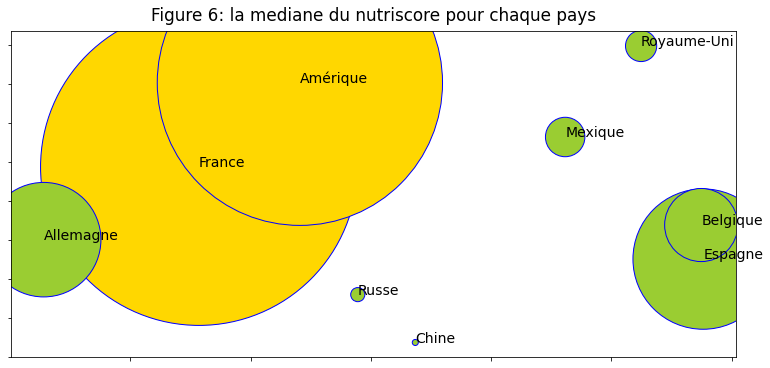

In [15]:
N = df_filter.shape[0]
x, y = np.random.uniform(low=2, high=10, size=(N,)) , np.random.uniform(low=2, high=100, size=(N,))
s = np.array(df_filter.Newcount.to_numpy(), dtype=int)
c = np.array(df_filter.nutriscore_score.to_numpy(), dtype=int)

pl.figure(figsize=(13,6))
colors= {'A':'darkgreen', 'B':'yellowgreen', 'C':'gold','D':'darkorange','E':'orangered'}
pl.scatter(x,y, c=df_filter['nutriscore_groups'].apply(lambda i: colors[i]),edgecolors='b',s=s/2)

ax = pl.gca()
ax.set_yticklabels([])
ax.set_xticklabels([])
for i in range(df_filter.shape[0]):
    pl.annotate("{}".format(df_filter["countries"].iloc[i]),xy=(x[i], y[i]))
pl.title("Figure 7: la mediane du nutriscore pour chaque pays", pad =10)

## F) Étudier la corrélation entre certains variables

<font color='darkblue'><font size="3">Application du PCA pour étudier la corrélation entre differentes variables.
<br>Le carbon footprint qui vient du viande ou poisson peut avoir une corrélation avec le vitamine b12, b6 ou omega3</font></font>

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as sklearnPCA

In [17]:
df_data_PCA = df_data

df_data_PCA_filter = df_data_PCA.filter(items=['carbon-footprint-from-meat-or-fish_100g', 'vitamin-b12_100g', 'vitamin-b6_100g', 'omega-3-fat_100g','nutriscore_groups'])
df_data_PCA = df_data_PCA_filter.dropna()

X = df_data_PCA[['carbon-footprint-from-meat-or-fish_100g', 'vitamin-b12_100g', 'vitamin-b6_100g', 'omega-3-fat_100g']]

meas = df_data_PCA[['nutriscore_groups']].values
meas = pd.DataFrame(data = meas,columns=['nutriscore_groups'])

<font color='darkblue'><font size="3">Vérifier par la méthode **svd** (Singular Value Decomposition) le nombre de component à utiliser.  </font></font>

Text(0.5, 1.0, 'une plot visualisant le % de chacun des variable choisi par la méthode SVD')

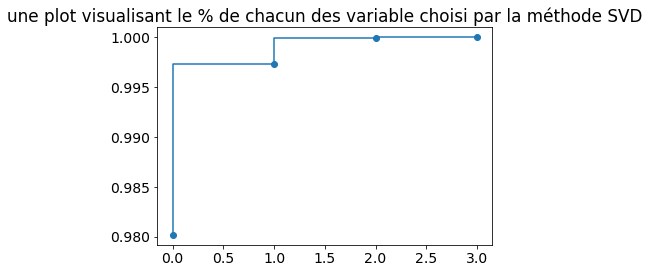

In [18]:
u,sig,v = np.linalg.svd(X)
pl.step(range(4),np.cumsum(sig)/sum(sig),'-o')
pl.title("une plot visualisant le % de chacun des variable choisi par la méthode SVD")

<font color='darkblue'><font size="3">La figure ci-dessus représente le pourcentage en expliquant les données de chaque variable que nous avons choisie, la première composante explique 98% des données, la seconde explique jusqu'à 99%. Nous choisissons donc n = 2, car les données sont très bien présentées par les deux premières composantes.</font></font>
<br><font size="3"> https://www.strategicresearch.fr/data-science-reduire-les-donnees-avec-lanalyse-en-composantes-principales-acp/#:~:text=L'analyse%20en%20composantes%20principales%20 </font></font>

In [19]:
X_std = StandardScaler().fit_transform(X)

sklearn_pca = sklearnPCA(n_components=2)
component = sklearn_pca.fit_transform(X_std)
df_component = pd.DataFrame(data = component,columns = ['principal component 1', 'principal component 2'])
df_PCA = pd.concat([df_component, meas], axis = 1)

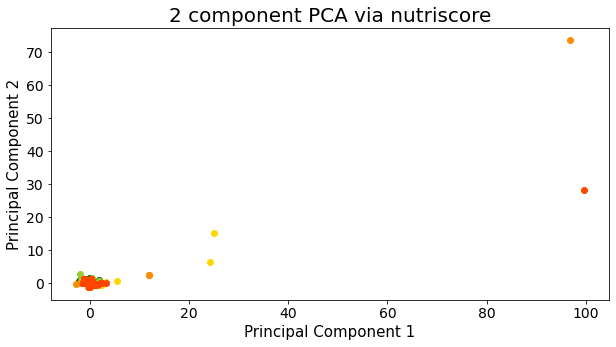

In [20]:
colors = ['darkgreen', 'yellowgreen', 'gold','darkorange','orangered']

targets = ['A', 'B', 'C', 'D', 'E']
fig = pl.figure(figsize = (10,5))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA via nutriscore', fontsize = 20)
#df_PCA = df_PCA[(df_PCA['principal component 1']<20) & (df_PCA['principal component 2']<20)]
for target, color in zip(targets,colors):
    indicesToKeep = df_PCA['nutriscore_groups'] == target
    ax.scatter(df_PCA.loc[indicesToKeep, 'principal component 1'], df_PCA.loc[indicesToKeep, 'principal component 2'], c = color)
pl.show()

<font color='darkblue'><font size="3">Si nous considerons les valeurs plus que 15 pour le composant 1 et plus que 20 pour le composant 2 comme des outliers donc on se trouve sur la figure ci dessous:</font></font>

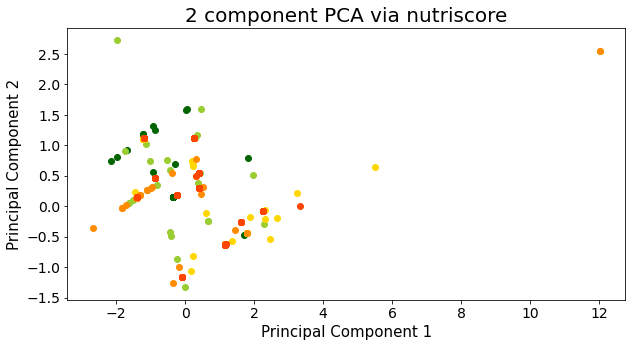

In [21]:
df_PCA_filter = df_PCA[(df_PCA['principal component 1']<15) & (df_PCA['principal component 2']<20)]

colors = ['darkgreen', 'yellowgreen', 'gold','darkorange','orangered']

targets = ['A', 'B', 'C', 'D', 'E']
fig = pl.figure(figsize = (10,5))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA via nutriscore', fontsize = 20)
#df_PCA = df_PCA[(df_PCA['principal component 1']<20) & (df_PCA['principal component 2']<20)]
for target, color in zip(targets,colors):
    indicesToKeep = df_PCA_filter['nutriscore_groups'] == target
    ax.scatter(df_PCA_filter.loc[indicesToKeep, 'principal component 1'], df_PCA_filter.loc[indicesToKeep, 'principal component 2'], c = color)
pl.show()

<font color='darkblue'><font size="3">Cependant, ce graphique ne nous montre rien sur les interactions entre les variables et leur relation avec les classes nutriscore. </font></font>

## G) Étudier l'influence de deux variables indépendantes catégorielles différentes sur une variable dépendante continue.

<font color='darkblue'><font size="3">Nous comptons étudier l'impact de la présence du huile du palme et le carbon footprint sur le group de nutriscore.
Pour mieux comprendre la relation ou la différence entre ces variables, nous présenterons un boxplot: </font></font>

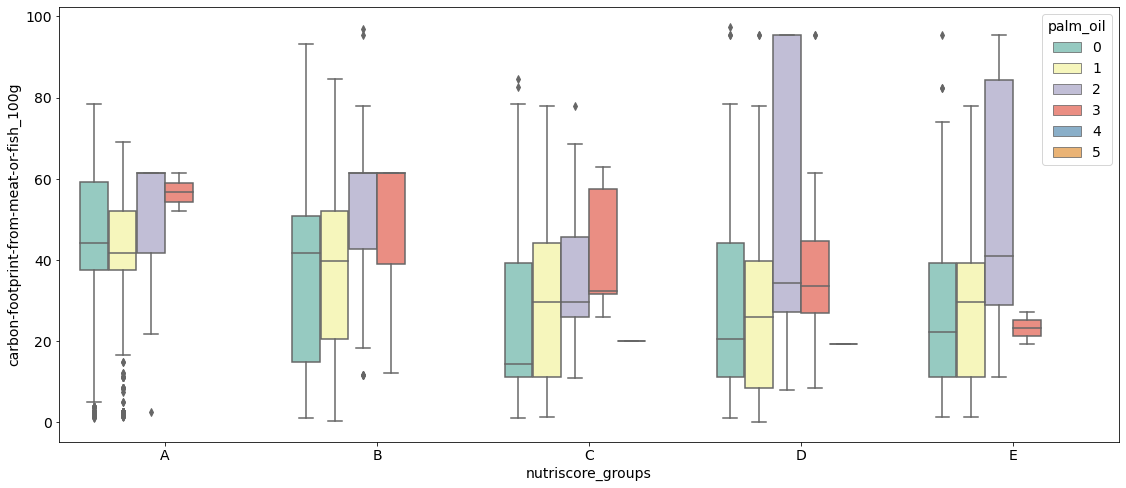

In [22]:
df_clean = df_data#.dropna(subset=['main_category'])
fig = pl.figure(figsize = (19,8))
sn.boxplot(y="carbon-footprint-from-meat-or-fish_100g", x="nutriscore_groups", hue="palm_oil", data=df_clean, palette="Set3") 

<font color='darkblue'><font size="3">Le boxplot ne nous a pas montré beaucoup d'informations, nous allons donc utiliser l'ANOVA..</font></font>

In [23]:
## les variables utilisées lors de la méthode ANOVA doivent être flottantes et non pas de type catégorie
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532498 entries, 0 to 532497
Data columns (total 22 columns):
 #   Column                                   Non-Null Count   Dtype   
---  ------                                   --------------   -----   
 0   product_name                             532498 non-null  object  
 1   main_category                            532496 non-null  object  
 2   origins                                  53168 non-null   object  
 3   countries                                532498 non-null  object  
 4   brands                                   393439 non-null  object  
 5   ingredients_that_may_be_from_palm_oil_n  526055 non-null  float64 
 6   nutriscore_score                         489972 non-null  float64 
 7   nova_group                               521012 non-null  float64 
 8   nutrition-score-fr_100g                  489972 non-null  float64 
 9   collagen-meat-protein-ratio_100g         2196 non-null    float64 
 10  carbon-footprint-fro

In [24]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

df_ANOVA = df_clean.filter(items=['nutriscore_groups', 'carbon-footprint-from-meat-or-fish_100g','palm_oil'])

df_ANOVA.rename(columns = {'carbon-footprint-from-meat-or-fish_100g':'carbon_footprint'}, inplace = True)

dictn={"A":1, "B":2, "C":3, "D":4, "E":5}
df_ANOVA = df_ANOVA.replace({"nutriscore_groups": dictn})

df_ANOVA['nutriscore_groups'] = pd.to_numeric(df_ANOVA['nutriscore_groups'], errors='ignore')
df_ANOVA['palm_oil'] = pd.to_numeric(df_ANOVA['palm_oil'], errors='ignore')

df_ANOVA = df_ANOVA.dropna(subset=['palm_oil','carbon_footprint','nutriscore_groups'])

model = ols('nutriscore_groups ~ C(carbon_footprint)+C(palm_oil)+C(carbon_footprint):C(palm_oil)', data=df_ANOVA).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

C:\Users\Rouba\anaconda3\lib\site-packages\statsmodels\base\model.py:1830: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 396, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\Users\Rouba\anaconda3\lib\site-packages\statsmodels\base\model.py:1830: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 0
  warnings.warn('covariance of constraints does not have full '
C:\Users\Rouba\anaconda3\lib\site-packages\statsmodels\base\model.py:1848: RuntimeWarning: invalid value encountered in true_divide
  F /= J
C:\Users\Rouba\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\Users\Rouba\anaconda3\lib\site-packages\statsmodels\base\model.py:1830: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1584, but rank is 

,sum_sq,df,F,PR(>F)
C(carbon_footprint),0.001882,396.0,0.000007,0.999993
C(palm_oil),NaN,4.0,NaN,NaN
C(carbon_footprint):C(palm_oil),1781.481198,1584.0,1.635365,0.200966
Residual,69477.546664,101026.0,NaN,NaN


<font color='darkblue'><font size="3">Le p-value doit être<0.05 pour être significant. Dans ce cas, la valeur p est très élevée presque une valeur qui indique qu'il n'y a aucun effet et que nous ne pouvons pas rejeter l'hypothèse nulle</font></font>

## H) Présentation de l'application

<font color='darkblue'><font size="3">L'idée de mon application est très simple, utile et flexible aux changements. Comme nous l'avons montré dans le Notebook précédent, le régime végétalien se développe et touche de plus en plus de personnes, mais les stands dans les supermarché sont toujours les mêmes, sans indication pour chaque produit s'il est végétalien ou non. Mon idée est donc de présenter ce travail à Santé publique France et de leur fournir, disons, les Notebooks et tout le processus, et ce qu'ils peuvent faire est simplement de vérifier les produits qui sont vendus en France et de créer un système d'étiquetage (comme nutriscore et NOVA). Et comme le véganisme ne se limite pas à l'alimentation, ils peuvent l'appliquer à d'autres produits comme les vêtements.</font></font>

In [261]:
# Idée application: mettre le nom du produit et il nous donne si il est végetarien, vegan ou no. Avec quelque information nutri
#
value= input("Please put the name of the product: ")
if df_data[df_data["product_name"]==value].shape[0]!=0:
    variable = input(" and the name of the brand \n No if you dont know: ")
    if variable == "No" or variable == 'no':
         print('The brands are:{}'.format(df_data.loc[df_data["product_name"]==value, "brands"].values.tolist()))
         print('\nKindly, choose your option of brand and try again')
    elif variable in df_data["brands"][df_data["product_name"]==value].tolist():
        indice = df_data[(df_data["product_name"] == value) & (df_data["brands"] == variable) ].index
        df_desire = df_data.loc[indice]
        
        if ((df_desire['vitamin-b12_100g']>=0.5) | (df_desire['vitamin-b6_100g']>=0.5) | (df_desire['omega-3-fat_100g']>=0.5)).any():
            print(colored("This product contains meat",'red'))
            print("With Nutriscore class {}, NOVA group {} and {} number of ingredients with palm oil".format(df_desire['nutriscore_groups'].iloc[0], df_desire['nova_grp'].iloc[0],df_desire['palm_oil'].iloc[0]))
            print("This product has {}g of calcium, {}g of iron and {}g zinc (in 100g of product)".format(df_desire["calcium_100g"].iloc[0], df_desire["iron_100g"].iloc[0], df_desire["zinc_100g"].iloc[0]) )
            print('This product is sold in: {}'.format(df_desire["countries"].iloc[0]))
        elif ((df_desire['-lactose_100g']>0)).any():# & (df_desire['vitamin-b12_100g']<0) & (df_desire['vitamin-b6_100g']<0) & (df_desire['omega-3-fat_100g']<0)).any():
            print(colored("This food contain milk",'yellow'))
            print("With Nutriscore class {}, NOVA group {} and {} number of ingredients with palm oil".format(df_desire['nutriscore_groups'].iloc[0], df_desire['nova_grp'].iloc[0],df_desire['palm_oil'].iloc[0]))
            print("This product has {}g of calcium, {}g of iron and {}g zinc (in 100g of product)".format(df_desire["calcium_100g"].iloc[0], df_desire["iron_100g"].iloc[0], df_desire["zinc_100g"].iloc[0]) )
            print('This product is sold in: {}'.format(df_desire["countries"].iloc[0]))
        elif ((df_desire['omega-3-fat_100g']<=0) & (df_desire['vitamin-b12_100g']<=0) & (df_desire['vitamin-b6_100g']<=0) & (df_desire['-lactose_100g']<=0)).any():
            print(colored("This food is vegeterian",'darkgreen'))
            print("With Nutriscore class {}, NOVA group {} and {} number of ingredients with palm oil".format(df_desire['nutriscore_groups'].iloc[0], df_desire['nova_grp'].iloc[0],df_desire['palm_oil'].iloc[0]))
            print("This product has {}g of calcium, {}g of iron and {}g zinc (in 100g of product)".format(df_desire["calcium_100g"].iloc[0], df_desire["iron_100g"].iloc[0], df_desire["zinc_100g"].iloc[0]) )
            print('This product is sold in: {}'.format(df_desire["countries"].iloc[0]))
        else:
            print("More research are recommended")
    else:
        print("Your choice {} is not valid".format(variable))
        print("Here are the choices of brands {}".format(df_data.loc[df_data["product_name"]==value, "brands"].values.tolist()))
        print('\nKindly, choose your option of brand and try again')
else:
    
    print("Your choice {} is not valid".format(value))

Please put the name of the product: bread
 and the name of the brand 
 No if you dont know: bismi
More research are recommended
